# Project Introduction

The insurance industry plays a pivotal role in managing financial risks and providing security to individuals and businesses. 
One of the critical aspects of this industry is accurately estimating insurance costs, which can be influenced by a multitude
of factors ranging from demographics to policy coverage. To enhance the efficiency and accuracy of cost estimation, predictive
modeling techniques are being increasingly employed. 
Health insurance costs have risen dramatically over the past decade in response to the rising cost of health care services 
and are determined by a multitude of factors. Let's look at the cost of healthcare for a sample of the population given age,
sex, bmi, number of children, smoking habits, and region.

# Project Background

Traditionally, insurance cost calculations have been based on actuarial tables and historical data. While these methods are 
informative, they often overlook complex interactions between variables and may not adapt swiftly to changing market dynamics. 
With the advent of big data and advances in machine learning, insurance companies can now harness the potential of predictive 
modeling to optimize pricing strategies, mitigate risks, and provide more personalized services to their clients.


# Main Objective

This project aims to develop a sophisticated predictive model for insurance cost estimation, leveraging the power of data science
and machine learning.
This Machine learning model developed to predict the insurance price charged to the customer. The charge depends on various 
features such as age, type of coverage, amount of coverage needed, gender, body mass index (BMI), region, and other special 
factors like smoking to determine what health risks the person possesses.

The purpose of this project is to determine the contributing factors and predict health insurance cost by performing exploratory 
data analysis and predictive modeling on the Health Insurance dataset. This project makes use of Numpy, Pandas, Sci-kit learn, 
and Data Visualization libraries.

## Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Loading Data Set

In [2]:
df = pd.read_csv('Insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# Attribute Information

● age: age of primary beneficiary

● sex: beneficiary’s gender - female or male

● bmi: Body mass index, providing an understanding of body, weights that are
  relatively high or low relative to height, objective index of body weight (kg / m ^2) using the ratio of height to weight,       ideally 18.5 to 24.9
  
● children: Number of children covered by health insurance / Number of
  dependents
  
● smoker: Smoking or non-smoking

● region: the beneficiary&#39;s residential area in the US; northeast, southeast,
  southwest, northwest.
  
● charges: Individual medical costs billed by health insurance (to be predicted)

● Id: id of beneficiary

In [4]:
df.shape

(1338, 7)

There are 1338 records in dataset, each record represent the customer data.

- For each record , the dataset records 7 input variable that stand for both qualitative and quantitative attributes of the 
  customer, such as age, sex, bmi, children, smoker, region, and charges.

- There is single continuous output variable that gives the insurance premium charged.

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We found that :

      age,bmi,children,charges are numerical columns.
      sex,smoker,region are categorical columns.

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Here, None of the numerical columns have zero standard deviation.

Column insights:

- Age: Minimum is 18 ,Maximum is 64 and Mean is 39.20 .
- bmi: Minimum is 15.96 ,Maximum is 53.13 and Mean is 30.66 .
- children: Minimum is 0 ,Maximum is 5 and Mean is 1.09 .
- charges: Minimum is 1121.87 ,Maximum is 63770.42 and Mean is 13270.42 .

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no missing values in dataset.

This is a check for null values, no missing value found.
Moving further to check duplicate data.

In [8]:
df.duplicated().sum()

1

Duplicate values found.

Dropping duplicate records.

In [9]:
df.drop_duplicates(inplace=True)

Duplicates has been droped.

In [10]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

we checked for distict count values of each columns of dataset.

# Exploratory Data Analysis (EDA)

To obtain a better understanding of the dataset, the distribution of key variables and the relationships among them were plotted.



### Univariate Analysis

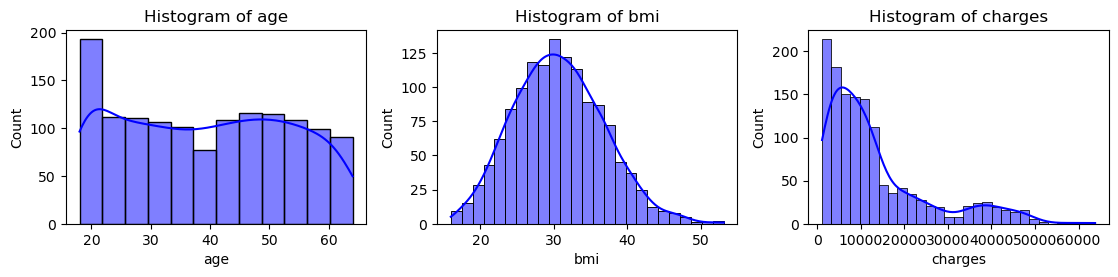

In [11]:
ulist = ['age', 'bmi', 'charges']
plot_num = 1
plt.figure(figsize=(15,10))
for i in ulist:
    ax = plt.subplot(4,4,plot_num)
    sns.histplot(df[i], kde=True, color='blue')
    plt.title('Histogram of ' + i)
    plot_num +=1
plt.tight_layout()

Column Insights on basis of histogram :

- Age : In age group 20 their are maximum customers where as age group of 40 has the lowest customers. And the rest of age group         has a count value around 100.
- BMI : It is a slightly right skewed graph. Where most of the customers have bmi of 25 to 35. Maximum customers are found in           bmi group 30.
- Charges : It is a rightly skewed graph. most of the customers have the charge value of 1120 to 15000.

<Axes: xlabel='charges', ylabel='Density'>

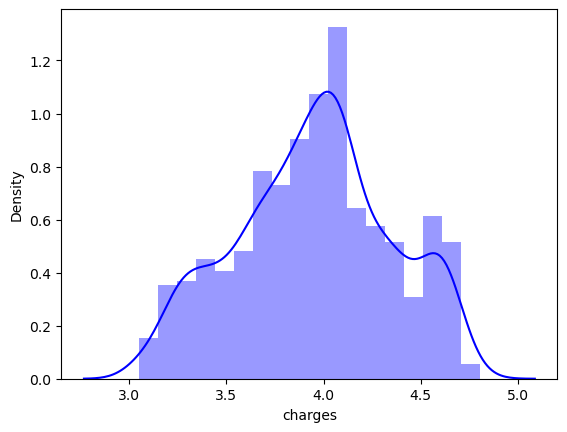

In [12]:
sns.distplot(np.log10(df.charges), color = 'blue',)

The distribution of the charges is skewed to the right, so we applied natural log for ~ normal distribution.

### Bivariate Analysis

#### Charges By Region

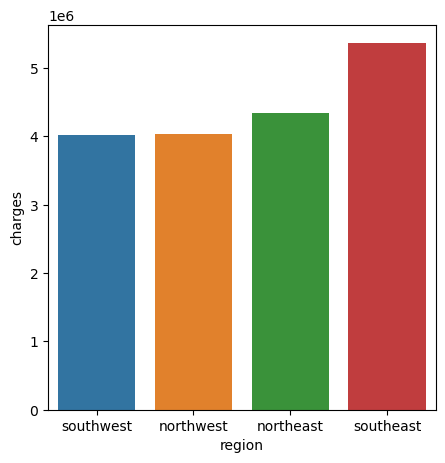

In [13]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
plt.figure(figsize=(5,5))
ax = sns.barplot(x = charges.index, y = charges)
plt.show()

The highest amount of charges are in the Southeast while the lowest are in the Southwest. Based on this, let's see how 
charges change by region when accounting for other factors, such as number of children, gender, and smoking behavior.

#### Charges by region and number of children

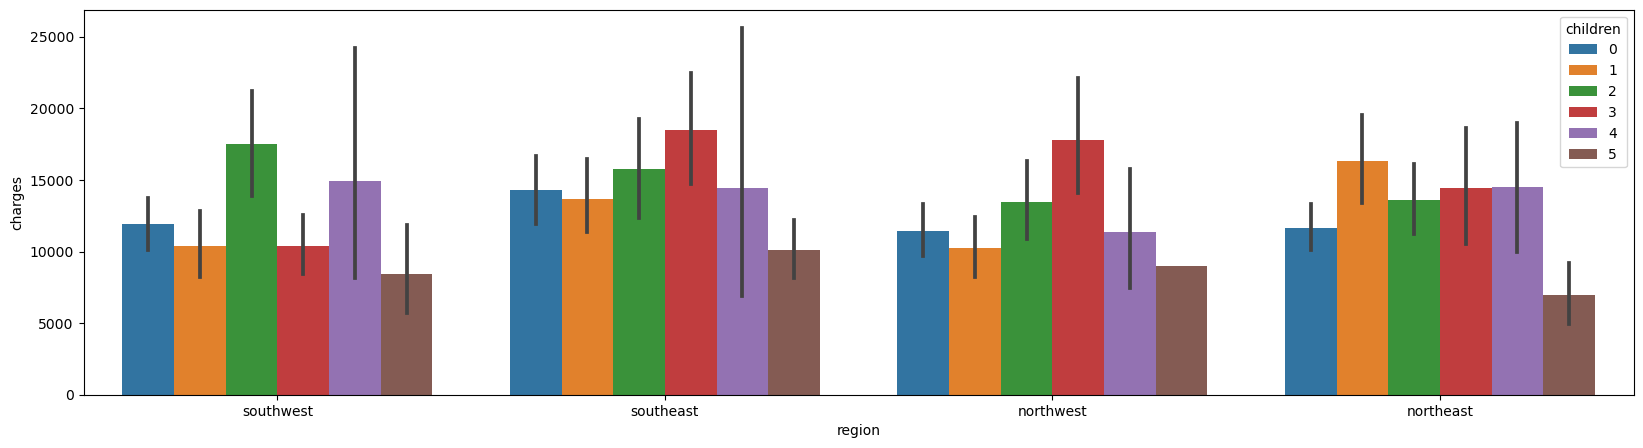

In [14]:
# Setting children as hue parameter
plt.figure(figsize=(20,5))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'children', data = df)

It seems that there is not a statistical difference in terms of how the number of children in a particular region affects charges.

#### Charges by region and gender

<Axes: xlabel='region', ylabel='charges'>

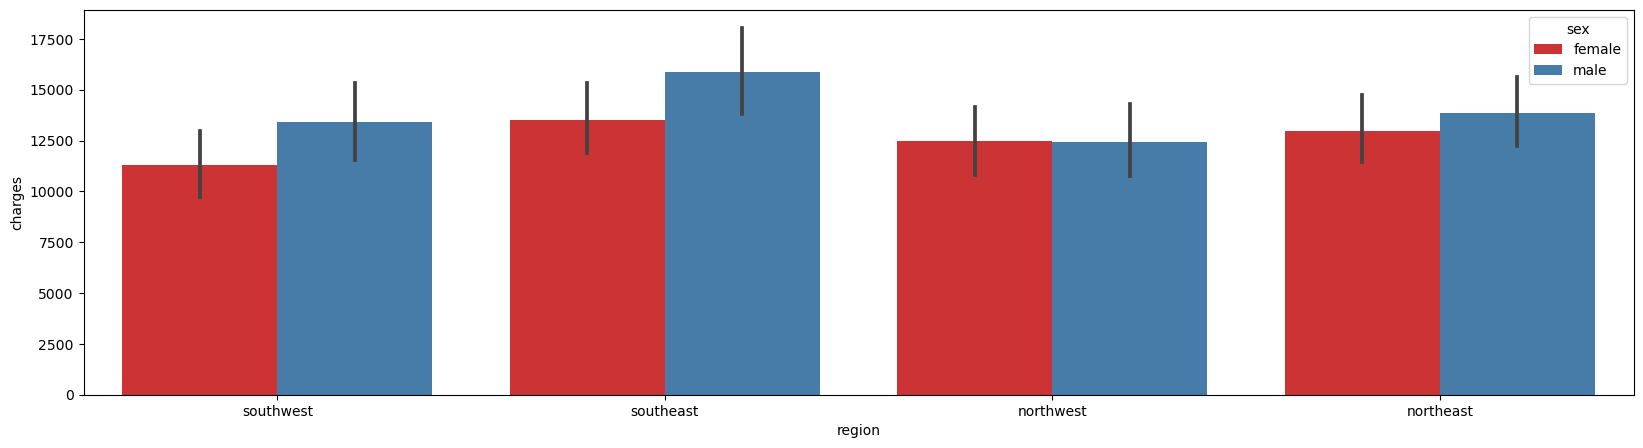

In [15]:
# setting Sex as hue parameter
plt.figure(figsize=(20,5))
sns.barplot(x = 'region', y = 'charges', hue = 'sex', data = df, palette = 'Set1')

Again, similar to the previous graph, it seems that there is not a statistical difference in terms of how gender in a particular region affects charges.

#### Charges by region and smoking behaviour

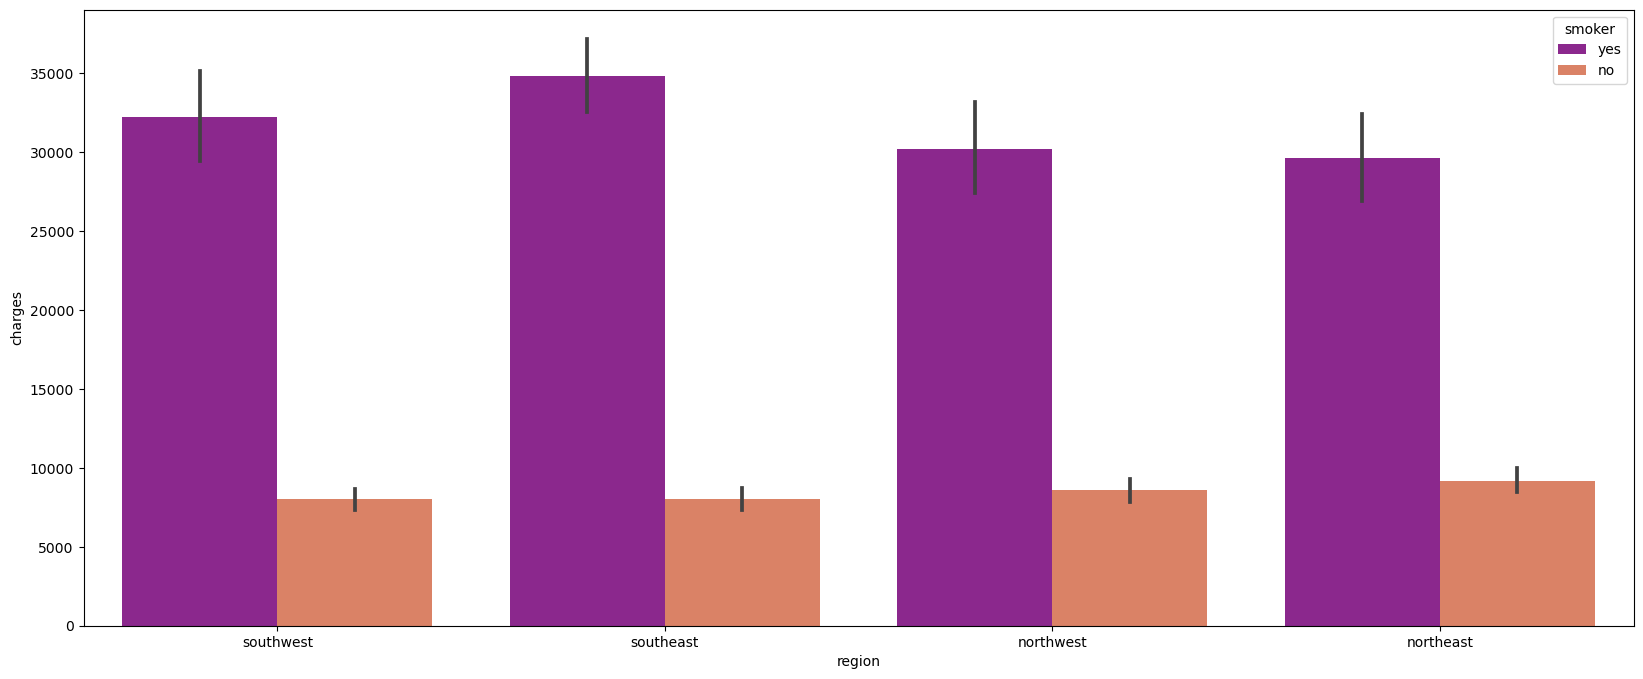

In [16]:
f, ax = plt.subplots(1, 1, figsize = (20, 8))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'smoker', data = df,palette='plasma')

In contrast to the other factors, there seems to be a statistical significance in terms of how smoking behavior in a region affects charges.

##### From these bar charts, we can see that smoking behavior by region significantly affected medical charges. So, let's see the correlation between non-categorical variables age, bmi, and children with medical charges (evaluated based on smoking behavior).

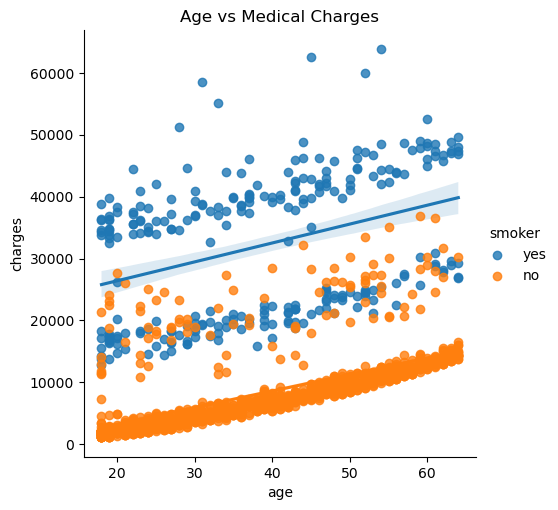

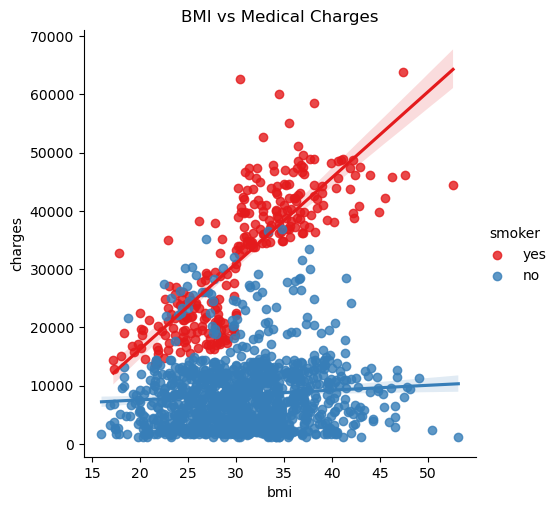

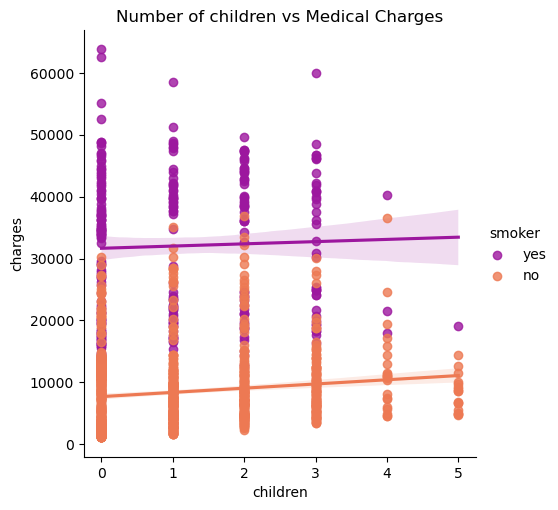

In [17]:
ax = sns.lmplot(x = 'age', y = 'charges', data = df, hue = 'smoker')
plt.title('Age vs Medical Charges')

ax = sns.lmplot(x = 'bmi', y = 'charges', data = df, hue = 'smoker',palette='Set1')
plt.title('BMI vs Medical Charges')

ax = sns.lmplot(x = 'children', y = 'charges', data = df, hue = 'smoker',palette='plasma')
plt.title('Number of children vs Medical Charges')
plt.show()

Based on the analysis,

- We know that smoking has a great impact on medical costs.
- Smoking in combination with an increase in other factors, such as age, bmi, and children, further emphasizes and increases the medical cost due to smoking.


# Data Preprocessing

## Outlier Handling

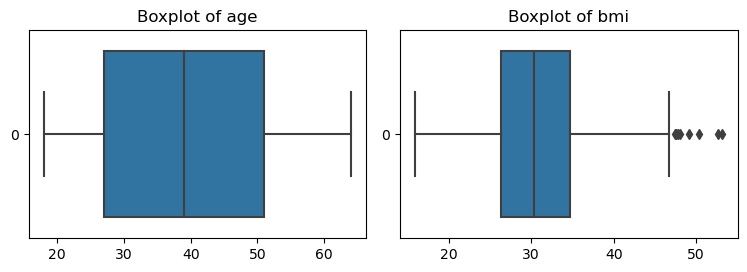

In [18]:
ulist = ['age', 'bmi']
plot_num = 1
plt.figure(figsize=(15,10))
for i in ulist:
    ax = plt.subplot(4,4,plot_num)
    sns.boxplot(df[i], orient='h')
    plt.title('Boxplot of ' + i)
    plot_num +=1
plt.tight_layout()

In [19]:
IQR_age=stats.iqr(df.age)
IQR_age

24.0

In [20]:
Q1_age = np.percentile(df.age,25)
Q3_age = np.percentile(df.age,75)

In [21]:
LB_age = Q1_age - 1.5*IQR_age
UB_age = Q3_age + 1.5*IQR_age

In [22]:
df.loc[df.age>UB_age,'age']

Series([], Name: age, dtype: int64)

In [23]:
df.loc[df.age<LB_age,'age']

Series([], Name: age, dtype: int64)

In [24]:
df[(df.age<UB_age)&(df.age>LB_age)]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [25]:
IQR_bmi = stats.iqr(df.bmi)
IQR_bmi

8.410000000000004

In [26]:
Q1_bmi = np.percentile(df.bmi,25)
Q3_bmi = np.percentile(df.bmi,75)

In [27]:
LB_bmi = Q1_bmi - 1.5 *IQR_bmi
UB_bmi = Q3_bmi + 1.5 *IQR_bmi

In [28]:
df.loc[df.bmi>UB_bmi,'bmi']

116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64

In [29]:
df.loc[df.bmi<LB_bmi,'bmi']

Series([], Name: bmi, dtype: float64)

In [30]:
df[(df.bmi<UB_bmi)&(df.bmi>LB_bmi)]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [31]:
((1337-1328)/1337)*100

0.6731488406881078

In [32]:
df.bmi.median()

30.4

In [33]:
df.loc[df.bmi>UB_bmi,'bmi']=30.4

## Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int32  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int32  
 5   region    1337 non-null   int32  
 6   charges   1337 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 100.2 KB


In [36]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


## Scaling

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scale = MinMaxScaler()
df[['age','sex','bmi','children','smoker','region','charges']]=scale.fit_transform(df[['age','sex','bmi','children','smoker','region','charges']])

In [39]:
df

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.387788,0.0,1.0,1.000000,0.251611
1,0.000000,1.0,0.578435,0.2,0.0,0.666667,0.009636
2,0.217391,1.0,0.553426,0.6,0.0,0.666667,0.053115
3,0.326087,1.0,0.219065,0.0,0.0,0.333333,0.333010
4,0.304348,1.0,0.419617,0.0,0.0,0.333333,0.043816
...,...,...,...,...,...,...,...
1333,0.695652,1.0,0.487496,0.6,0.0,0.333333,0.151299
1334,0.000000,0.0,0.518350,0.0,0.0,0.000000,0.017305
1335,0.000000,0.0,0.678467,0.0,0.0,0.666667,0.008108
1336,0.065217,0.0,0.319584,0.0,0.0,1.000000,0.014144


## Feature Selection and Correlation

To confirm our findings, let's look at the correlation between all the columns by constructing a pairplot and correlation heatmap.

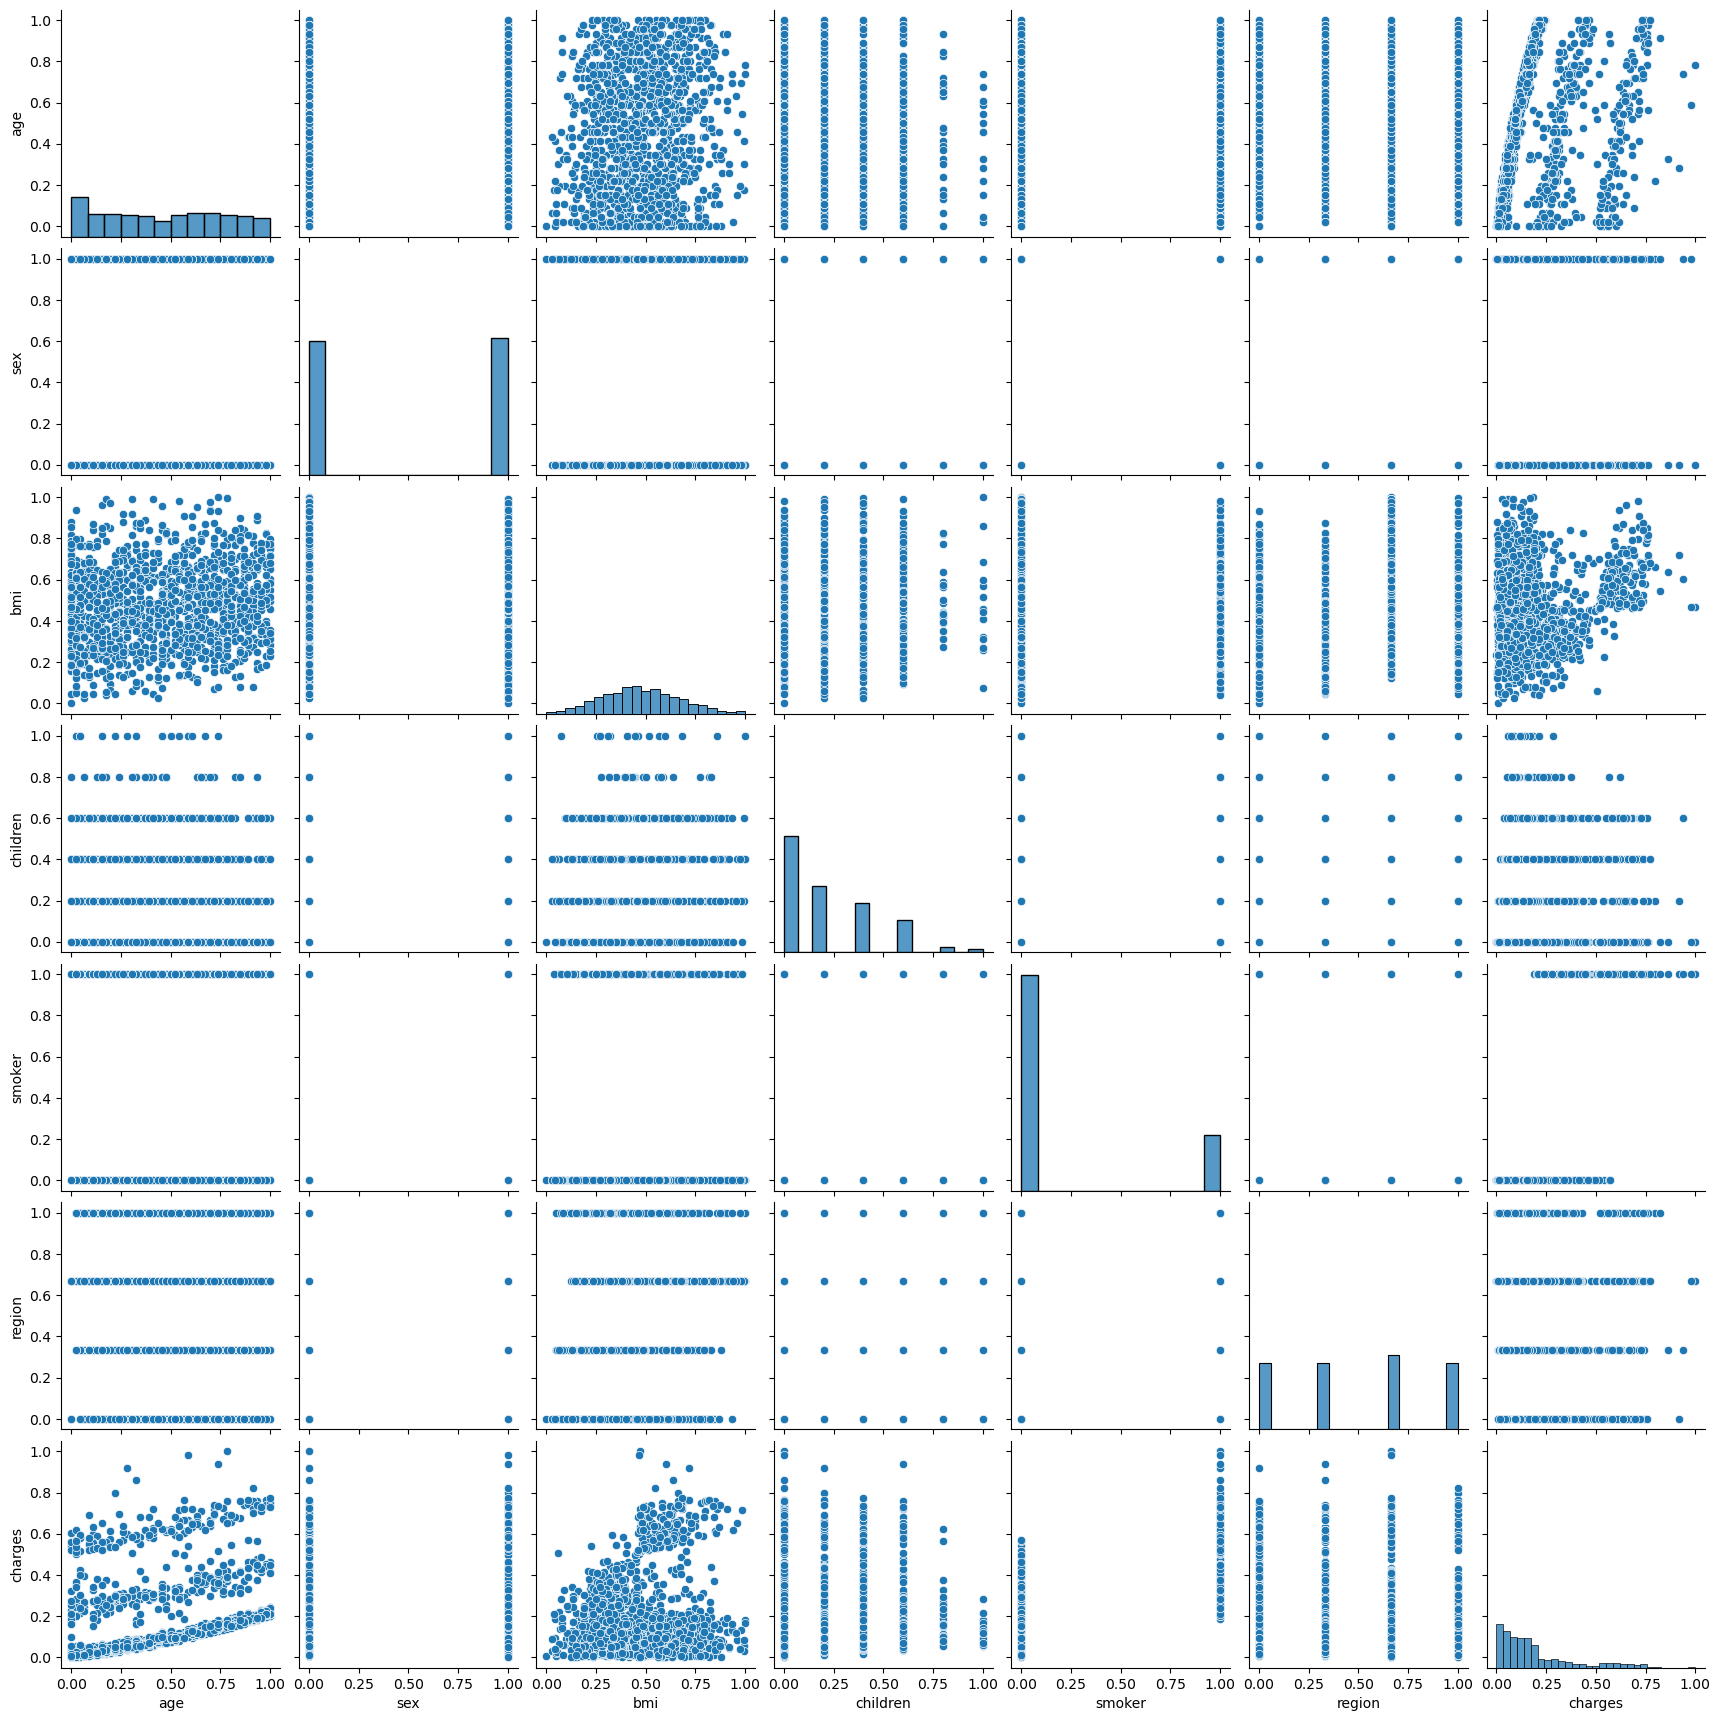

In [40]:
sns.pairplot(df)
plt.show()

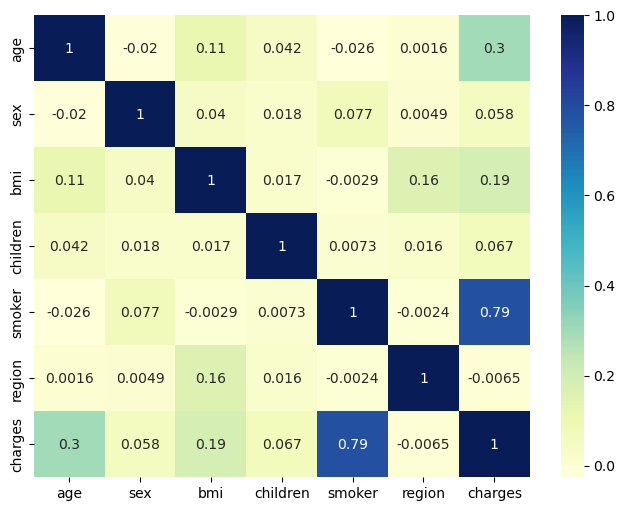

In [41]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

- Looking at the heatmap values, we don't need to drop any column.
- The heatmap shows the variables that are multicollinear in nature and the variables that have high collinearity with the target varible (charges).
- This reveals that smoking behavior, followed by age and bmi, are greatly correlated with medical charges.

## Data Splitting

Spliting the data into training and testing data.

In [42]:
X = df.drop('charges',axis=1)
y = df.charges

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [45]:
X_train.shape

(1069, 6)

In [46]:
y_train.shape

(1069,)

In [47]:
X_test.shape

(268, 6)

In [48]:
y_test.shape

(268,)

## Machine Learning 

The goal is to determine the insurance cost for an individual based on several factors. Therefore, this is a regression case. Regression models a target prediction value based on independent variables. 

## Model Creation

In [49]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

models = [LinearRegression(),
         Ridge(),
         ElasticNetCV(),
         DecisionTreeRegressor(),
         RandomForestRegressor(),
         GradientBoostingRegressor(),
         ExtraTreesRegressor(),
         XGBRegressor()]

In [50]:
from sklearn import model_selection

In [51]:
def train(model):
    kfold = model_selection.KFold(n_splits=5)
    pred = model_selection.cross_val_score(model,X,y,cv=kfold,scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    print('Model:' , model)
    print('Absolute CV score:', abs(cv_score))

In [52]:
for model in models:
    train(model)

Model: LinearRegression()
Absolute CV score: 0.009450033537775123
Model: Ridge()
Absolute CV score: 0.009450307313921057
Model: ElasticNetCV()
Absolute CV score: 0.009448087985039244
Model: DecisionTreeRegressor()
Absolute CV score: 0.010575214332484411
Model: RandomForestRegressor()
Absolute CV score: 0.00605480980991562
Model: GradientBoostingRegressor()
Absolute CV score: 0.005380336515463125
Model: ExtraTreesRegressor()
Absolute CV score: 0.006812170882468586
Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None

- Various models were imported to see different results
- These are common models for regression problems.
- Which model has the least CV score that model is better model.
- As seen in above Gradient Boosting Regressor is best model than the other models.
- Now we can train the models who have less CV score.

## Model Building and Evaluation

In [53]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Gradient Boosting Regressor

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=11)

In [55]:
g_model = GradientBoostingRegressor()
g_model.fit(X_train,y_train)
g_y_pred = g_model.predict(X_test)

### Error Difference

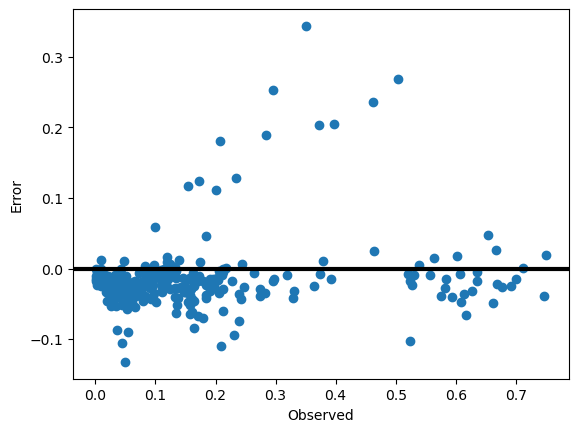

In [56]:
error = y_test - g_y_pred
fig,ax = plt.subplots()
ax.scatter(y_test,error)
ax.axhline(lw=3,color = 'black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [57]:
mean_squared_error(y_test,g_y_pred)

0.003030404123116266

In [58]:
np.sqrt(mean_squared_error(y_test,g_y_pred))

0.05504910646973542

In [59]:
mean_absolute_error(y_test,g_y_pred)

0.03468913215624366

In [60]:
g_r2score = r2_score(y_test,g_y_pred)
g_r2score

0.9092782820566905

## Feature Importance Ranking

In [61]:
g_model.feature_importances_

array([0.11739495, 0.00070078, 0.19404412, 0.01210915, 0.67140756,
       0.00434344])

In [62]:
imp =g_model.feature_importances_
indices = np.argsort(imp)
features =X_train.columns

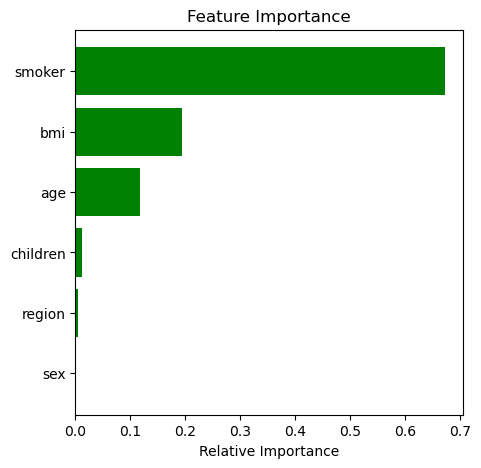

In [63]:
plt.figure(figsize=(5,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)),imp[indices],align = 'center',color='Green')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Based on the feature importances, we can see that the smoker,bmi,age and children are important although sex and region independent variables are not very important in determining the medical charges/insurance cost for an individual.


# Random Forest Regressor

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [65]:
r_model = RandomForestRegressor()
r_model.fit(X_train,y_train)
r_y_pred = r_model.predict(X_test)

### Error Difference

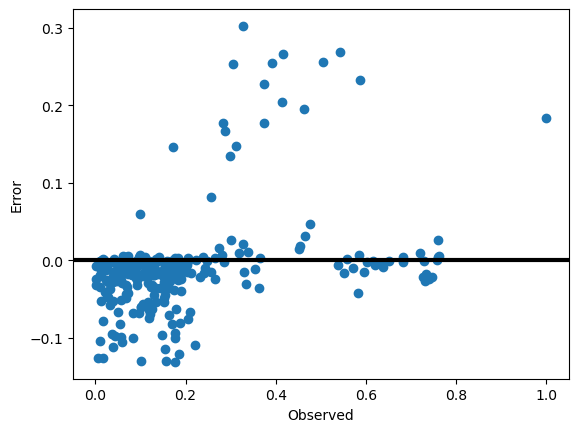

In [66]:
error = y_test - r_y_pred
fig,ax = plt.subplots()
ax.scatter(y_test,error)
ax.axhline(lw=3,color = 'black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [67]:
mean_squared_error(y_test,r_y_pred)

0.004532701354098604

In [68]:
np.sqrt(mean_squared_error(y_test,r_y_pred))

0.06732533961368932

In [69]:
mean_absolute_error(y_test,r_y_pred)

0.038462016565255545

In [70]:
r_r2score = r2_score(y_test,r_y_pred)
r_r2score

0.8815140904770037

# Extra Trees Regressor

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=11)

In [72]:
e_model = ExtraTreesRegressor()
e_model.fit(X_train,y_train)
e_y_pred = e_model.predict(X_test)

### Error Difference

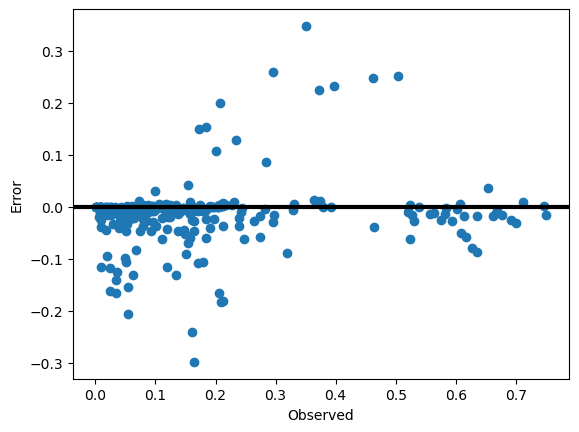

In [73]:
error = y_test - e_y_pred
fig,ax = plt.subplots()
ax.scatter(y_test,error)
ax.axhline(lw=3,color = 'black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [74]:
mean_squared_error(y_test,e_y_pred)

0.004501157425627826

In [75]:
np.sqrt(mean_squared_error(y_test,e_y_pred))

0.06709066571161615

In [76]:
mean_absolute_error(y_test,e_y_pred)

0.03442388337372753

In [77]:
e_r2score= r2_score(y_test,e_y_pred)
e_r2score

0.8652480930608297

# XGB Regressor

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [79]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_y_pred = xgb_model.predict(X_test)

### Error Difference

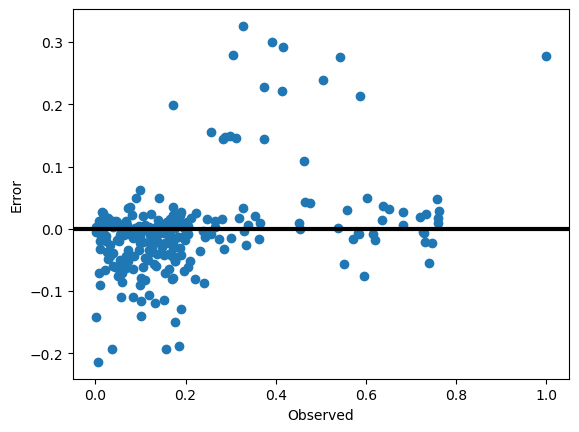

In [80]:
error = y_test - xgb_y_pred
fig,ax = plt.subplots()
ax.scatter(y_test,error)
ax.axhline(lw=3,color = 'black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [81]:
mean_squared_error(y_test,xgb_y_pred)

0.005486189200598773

In [82]:
np.sqrt(mean_squared_error(y_test,xgb_y_pred))

0.07406881395431394

In [83]:
mean_absolute_error(y_test,xgb_y_pred)

0.04367170945323089

In [84]:
xgb_r2score = r2_score(y_test,xgb_y_pred)
xgb_r2score

0.8565896875909542

# Elastic Net CV

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=11)

In [86]:
ela_model = ElasticNetCV()
ela_model.fit(X_train,y_train)
ela_y_pred = ela_model.predict(X_test)

### Error Difference

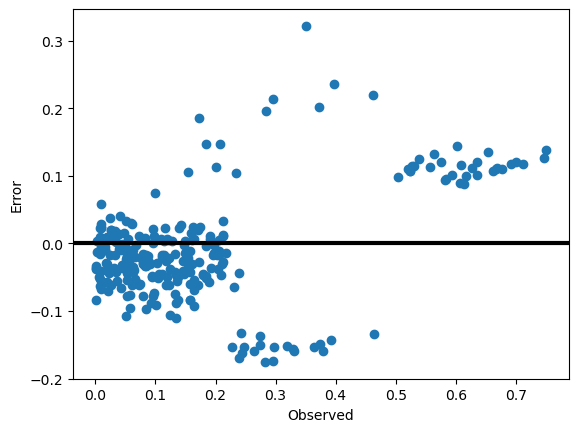

In [87]:
error = y_test - ela_y_pred
fig,ax = plt.subplots()
ax.scatter(y_test,error)
ax.axhline(lw=3,color = 'black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [88]:
mean_squared_error(y_test,ela_y_pred)

0.006197929394395637

In [89]:
np.sqrt(mean_squared_error(y_test,ela_y_pred))

0.0787269292834138

In [90]:
mean_absolute_error(y_test,ela_y_pred)

0.05816868314564111

In [91]:
ela_r2score = r2_score(y_test,ela_y_pred)
ela_r2score

0.8144515452372437

# Linear Regression

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=11)

In [93]:
l_model = LinearRegression()
l_model.fit(X_train,y_train)
l_y_pred = l_model.predict(X_test)

### Error Difference

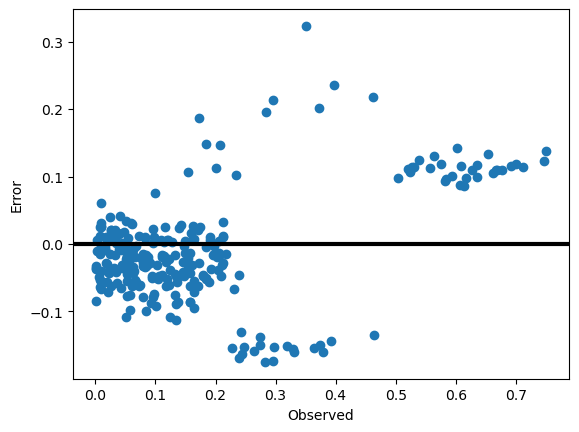

In [94]:
error = y_test - l_y_pred
fig,ax = plt.subplots()
ax.scatter(y_test,error)
ax.axhline(lw=3,color = 'black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [95]:
mean_squared_error(y_test,l_y_pred)

0.006215382800005314

In [96]:
np.sqrt(mean_squared_error(y_test,l_y_pred))

0.07883769910395225

In [97]:
mean_absolute_error(y_test,l_y_pred)

0.05837554521461111

In [98]:
l_r2score =r2_score(y_test,l_y_pred)
l_r2score

0.8139290396978693

# Ridge

In [99]:
rid_model = Ridge()
rid_model.fit(X_train,y_train)
rid_y_pred = rid_model.predict(X_test)

### Error Difference

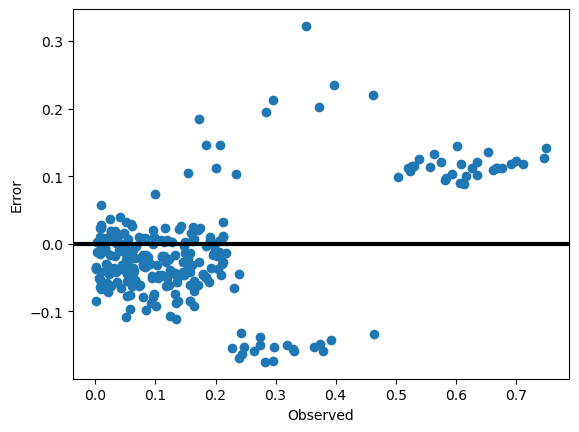

In [100]:
error = y_test - rid_y_pred
fig,ax = plt.subplots()
ax.scatter(y_test,error)
ax.axhline(lw=3,color = 'black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [101]:
mean_squared_error(y_test,rid_y_pred)

0.006212241202450445

In [102]:
np.sqrt(mean_squared_error(y_test,rid_y_pred))

0.07881777212310967

In [103]:
mean_absolute_error(y_test,rid_y_pred)

0.05826221949812715

In [104]:
rid_r2score= r2_score(y_test,rid_y_pred)
rid_r2score

0.8140230902322816

# Decision Tree Regressor

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=16)

In [106]:
d_model = DecisionTreeRegressor(max_depth=800,max_leaf_nodes=6,)
d_model.fit(X_train,y_train)
d_y_pred = d_model.predict(X_test)

### Error Difference

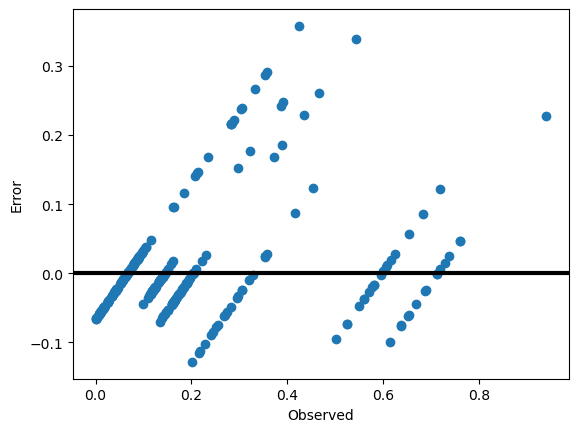

In [107]:
error = y_test - d_y_pred
fig,ax = plt.subplots()
ax.scatter(y_test,error)
ax.axhline(lw=3,color = 'black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [108]:
mean_squared_error(y_test,d_y_pred)

0.006651998560578709

In [109]:
np.sqrt(mean_squared_error(y_test,d_y_pred))

0.08155978519208293

In [110]:
mean_absolute_error(y_test,d_y_pred)

0.05169142686258911

In [111]:
d_r2score = r2_score(y_test,d_y_pred)
d_r2score

0.8312252325682288

In [112]:
r2scores = [g_r2score,r_r2score,e_r2score,xgb_r2score,ela_r2score,l_r2score,rid_r2score,d_r2score]

In [113]:
allmodels =['Gradient Boosting Regressor','Random Forest Regressor','Extra Tree Regressor','XGBRegressor','Elastic NetCV','Linear Regressor','Ridge','Decision Tree Regressor']

<Axes: >

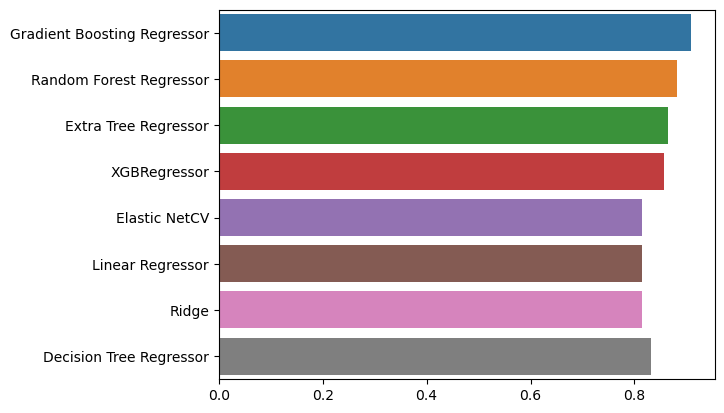

In [114]:
sns.barplot(x=r2scores, y=allmodels)

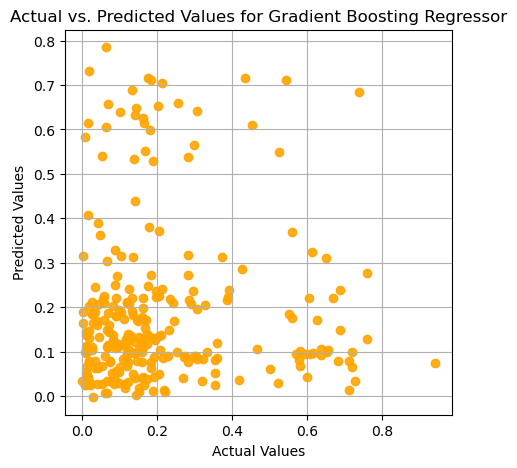

In [115]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, g_y_pred, alpha=0.9, color='orange')
plt.title("Actual vs. Predicted Values for Gradient Boosting Regressor")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

# Models Evaluation Table

|S.No.| Algorithms|Absolute CV Score|MSE|RMSE|MAE|r2_score|
|-----|-----------|-----------------|---|----|---|--------|
|1|Gradient Boosting Regressor| 0.0053       |0.0030|0.0550|0.0346|0.9092|
|2|Random Forest Regressor| 0.0060         |0.0045|0.0673|0.0384|0.8815|
|3|Extra Trees Regressor| 0.0068           |0.0045|0.0670|0.0344|0.8652|
|4|XGB Regressor| 0.0069            |0.0054|0.0740|0.0436|0.8565|
|5|Elastic NetCV| 0.0094           |0.0061|0.0787|0.0581|0.8144|
|6|Linear Regression|0.0094         |0.0062|0.0788|0.0583|0.8139|
|7|Ridge|  0.0094                  |0.0062|0.0788|0.0582|0.8140|
|8|Decision Tree Regressor| 0.0105       |0.0066|0.0815|0.0516|0.8312|

# Data Analysis Report

I completed this job using the steps listed below.

#### 1. Project Introduaction
#### 2. Project Background
#### 3. Main Objective
#### 4. Import Modules
#### 5. Loading Data Set
#### 6. Attribute Information 
    In this we give all information about features of the dataset.
#### 7. Data Cleaning
    In this we did 
    (a) described the data 
    (b) check null values
    (c) check duplicates and droped duplicate values.
#### 8. Exploratory Data Analysis (EDA)
    (a)Univariate Analysis : In this we use histplot and distplot
    (b)Bivariate Analysis  : In this we use barplot and lmplot
#### 9. Data Preprocessing
    (a)Outlier Handling : By using boxplot we visualized outliers and outliers are handled by IQR method.
    (b)Encoding         : In this we used Label Encoder to covert categorical columns to numeric.
    (c)Scaling          : In this we used MinMax Scaler
#### 10. Feature selection and Correlation
    In this we used pairplot and heatmap.
#### 11. Data Splitting
    We split 80% of data for training and 20% of data for testing.
#### 12. Machine Learning Model Creation
    Models Used : Gradient Boosting Regressor, Random Forest Regressor, Extra Tree Regressor, XGBRegressor, Elastic NetCV, 
                  Linear Regressor, Ridge, Decision Tree Regressor.
    We see absolute CV scores of the each model. Which model have the least absolute CV score that is the best model 
    and that is Gradient Boosting Regressor.
#### 13. Model Building and Evaluation
    - In this we trained each model and evaluate MSE, RMSE, MAE and r2_score.
    - Also we plot feature importance graph.
    - We plotted error difference graph of each model.
    - We plotted r2_score of each model in a graph.
    - We plotted actual vs predicted values for the best model Gradient Boosting Regressor.
#### 14. Model Evaluation Table
    In this MSE     : Mean Square Error
            RMSE    : Root Mean Square Error
            MAE     : Mean Absolute Error
            CV Score: Cross Validation Score
            

## Model Comparision Report

- Based on model evaluation Gradient Boosting Regressor have the best and highest r2_score.
- Random Forest Regressor can be considered as second most good model.

## Challenges Faced

Certain challenges faced to uderstand the data factors. And then I understood.

# Conclusion

In conclusion, the development and implementation of an insurance cost prediction regression model have proven to be a valuable
asset in the realm of risk assessment and financial planning for insurance companies. Through the utilization of historical
data, comprehensive features, and advanced machine learning techniques, this model has demonstrated its ability to provide
accurate and reliable estimates of insurance premiums.

One of the primary advantages of this model is its capacity to enhance decision-making processes within insurance organizations.
By providing insurers with a data-driven foundation for setting premiums, underwriting policies, and managing risk portfolios,
it enables them to optimize their pricing strategies and improve overall profitability. This model can also contribute to a fairer
and more equitable insurance market by ensuring that policyholders are charged premiums that accurately reflect their risk profiles.

In conclusion, the insurance cost prediction regression model stands as a powerful tool in the insurance industry, offering the 
promise of improved risk management, fairer pricing, and greater customer satisfaction. As it continues to evolve and adapt to 
changing conditions, it will play a pivotal role in shaping the future of the insurance sector.